<a href="https://colab.research.google.com/github/gogifemi/cannabis-health-diagnosis/blob/main/(colab)cannabishealth_VGG16_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gogifemi/cannabis-health-diagnosis.git

Cloning into 'cannabis-health-diagnosis'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 105 (delta 5), reused 6 (delta 3), pack-reused 85 (from 1)
Receiving objects: 100% (105/105), 212.64 MiB | 15.99 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Updating files: 100% (14/14), done.


In [2]:
!pip install tensorflow

In [3]:
!unzip /content/cannabis-health-diagnosis/data.zip -d /content/cannabis-health-diagnosis/data/

Archive:  /content/cannabis-health-diagnosis/data.zip
   creating: /content/cannabis-health-diagnosis/data/test/
   creating: /content/cannabis-health-diagnosis/data/train/
   creating: /content/cannabis-health-diagnosis/data/valid/
   creating: /content/cannabis-health-diagnosis/data/test/Aphids/
   creating: /content/cannabis-health-diagnosis/data/test/Botrytis/
   creating: /content/cannabis-health-diagnosis/data/test/Dehydration/
   creating: /content/cannabis-health-diagnosis/data/test/Healthy/
   creating: /content/cannabis-health-diagnosis/data/test/Leaf Miners/
   creating: /content/cannabis-health-diagnosis/data/test/Nitrogen Deficiency/
   creating: /content/cannabis-health-diagnosis/data/test/Nutrient Burn/
   creating: /content/cannabis-health-diagnosis/data/test/Overwatering/
   creating: /content/cannabis-health-diagnosis/data/test/PH Fluctuation/
   creating: /content/cannabis-health-diagnosis/data/test/Phosphorus Deficiency/
   creating: /content/cannabis-health-diagnos

In [4]:
!ls /content/cannabis-health-diagnosis/data/

test  train  valid


In [5]:
data_dir = '/content/cannabis-health-diagnosis/data/'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# **Training**

In [6]:
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D,Flatten
from tensorflow.keras.preprocessing import image # Keras own inbuild image class
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.metrics import Precision, Recall

In [7]:
from tensorflow.keras.optimizers import Adam

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow import keras as K
import tensorflow.keras.backend as K
K.clear_session()

#1. Select the convolutional base / Pretrained network
base_model = VGG16(include_top=False, input_shape=(128, 128, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [11]:
base_model.trainable= False

In [12]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, BatchNormalization, Dropout

In [18]:
inputs = Input(shape=(128,128,3))

base = base_model(inputs)

cnn_layer1 = Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')

cnn_layer2 = MaxPooling2D(pool_size=(2,2),strides=2)

dropout = Dropout(0.2)

flatten = Flatten()(base)

dense = Dense(128,activation='relu')

batch_nom = BatchNormalization(axis=1)

outputs = Dense(13,activation='softmax')(flatten)

model_tf = Model(inputs,outputs)

In [19]:
model_tf.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 13)                  │         106,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,821,197 (56.54 MB)

 Trainable params: 106,509 (416.05 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
classes = [
    'Aphids',
    'Botrytis',
    'Dehaydration',
    'Healthy',
    'Leaf Miners',
    'Nitrogen Deficiency',
    'Nutrient Burn',
    'Overwatering',
    'PH Fluctuation',
    'Phosphorus Deficiency',
    'Potassium Deficiency',
    'Powdery Mildew',
    'Septoria'
]

In [21]:
train_dir = '/content/cannabis-health-diagnosis/data/train'
val_dir = '/content/cannabis-health-diagnosis/data/valid'
test_dir = '/content/cannabis-health-diagnosis/data/test'

In [22]:
data_gen = image.ImageDataGenerator(1./255)

In [23]:
train_data_gen = data_gen.flow_from_directory(
    train_dir,
    class_mode="categorical",
    batch_size=150,
    target_size=(128, 128),
)

Found 1300 images belonging to 13 classes.


In [24]:
val_data_gen = data_gen.flow_from_directory(
    val_dir,
    class_mode="categorical",
    batch_size=150,
    target_size=(128, 128),
)

Found 260 images belonging to 13 classes.


In [25]:
test_data_gen = data_gen.flow_from_directory(
    test_dir,
    class_mode="categorical",
    batch_size=150,
    target_size=(128, 128),
)

Found 26 images belonging to 13 classes.


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
!pip install --upgrade tensorflow

In [ ]:
!pip show keras

Name: keras
Version: 3.4.1
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [28]:
import keras
from tensorflow.keras.metrics import AUC

In [29]:
from tensorflow.keras.optimizers import SGD

In [30]:
model_tf.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.7),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

model_tf.fit(train_data_gen,
             verbose=2,
             epochs=100,
             validation_data=val_data_gen)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 - 57s - 6s/step - accuracy: 0.1169 - auc: 0.5322 - loss: 18.2983 - precision: 0.1175 - recall: 0.1138 - val_accuracy: 0.1385 - val_auc: 0.5677 - val_loss: 15.0864 - val_precision: 0.1344 - val_recall: 0.1308
Epoch 2/100
9/9 - 4s - 422ms/step - accuracy: 0.3492 - auc: 0.7025 - loss: 8.5304 - precision: 0.3542 - recall: 0.3446 - val_accuracy: 0.2000 - val_auc: 0.5866 - val_loss: 13.3749 - val_precision: 0.2023 - val_recall: 0.2000
Epoch 3/100
9/9 - 5s - 602ms/step - accuracy: 0.5285 - auc: 0.8198 - loss: 4.5595 - precision: 0.5348 - recall: 0.5200 - val_accuracy: 0.2269 - val_auc: 0.6114 - val_loss: 12.4790 - val_precision: 0.2351 - val_recall: 0.2269
Epoch 4/100
9/9 - 5s - 511ms/step - accuracy: 0.6762 - auc: 0.8913 - loss: 2.5863 - precision: 0.6883 - recall: 0.6677 - val_accuracy: 0.2269 - val_auc: 0.6068 - val_loss: 12.2579 - val_precision: 0.2332 - val_recall: 0.2269
Epoch 5/100
9/9 - 6s - 651ms/step - accuracy: 0.7662 - auc: 0.9361 - loss: 1.5942 - precision: 0.7807 - recall: 0

In [31]:
model_tf.save('models/canhealth_VGG_128.h5')

In [32]:
model_tf.save('models/canhealth_VGG_128.keras')

In [33]:
img = image.load_img('/content/cannabis-health-diagnosis/data/test/Nutrient Burn/00_nutrient_burn_test.jpg',target_size=(128,128))

In [34]:
import numpy as np

In [35]:
img = np.expand_dims(img,axis=0) # or img = img.reshape(1,224,224,3)
img = preprocess_input(img)

/content/cannabis-health-diagnosis/data/test/Iron Deficiency/OIP-TTkrZNaBd4uI2Wv-iSjDMgHaE7_jpg.rf.910c110b1c5e9d6332fc268cb5ea281e.jpg

In [36]:
model_tf.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.4313941e-13, 1.4097032e-08, 3.4726998e-25, 3.0563617e-15,
        9.4870482e-14, 9.6608332e-10, 4.1622370e-13, 1.4607232e-09,
        5.1404354e-06, 2.5372885e-05, 4.3975112e-07, 9.9996901e-01,
        4.5210267e-22]], dtype=float32)

In [37]:
import matplotlib.pyplot as plt

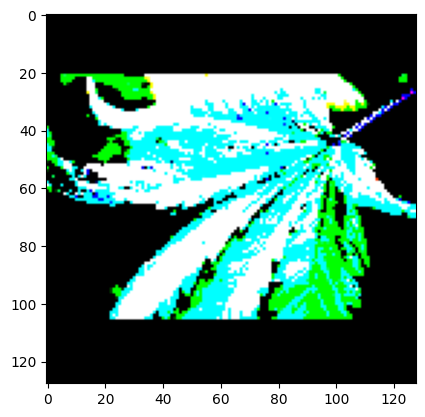

In [38]:
plt.imshow(img[0])

In [39]:
img.shape

(1, 128, 128, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Aphids'),
  Text(1, 0, 'Botrytis'),
  Text(2, 0, 'Dehaydration'),
  Text(3, 0, 'Healthy'),
  Text(4, 0, 'Leaf Miners'),
  Text(5, 0, 'Nitrogen Deficiency'),
  Text(6, 0, 'Nutrient Burn'),
  Text(7, 0, 'Overwatering'),
  Text(8, 0, 'PH Fluctuation'),
  Text(9, 0, 'Phosphorus Deficiency'),
  Text(10, 0, 'Potassium Deficiency'),
  Text(11, 0, 'Powdery Mildew'),
  Text(12, 0, 'Septoria')])

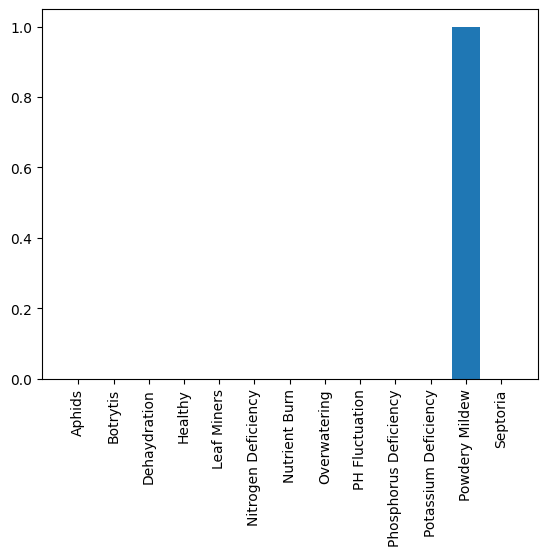

In [40]:
plt.bar(x = ['Aphids',
    'Botrytis',
    'Dehaydration',
    'Healthy',
    'Leaf Miners',
    'Nitrogen Deficiency',
    'Nutrient Burn',
    'Overwatering',
    'PH Fluctuation',
    'Phosphorus Deficiency',
    'Potassium Deficiency',
    'Powdery Mildew',
    'Septoria'], height = model_tf.predict(img)[0])
plt.xticks(rotation=90)